In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

In [67]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
escol = {5: 'Fundamental Completo', 7: 'Médio Completo', 9: 'Superior Completo', 10: 'Mestrado', 11: 'Doutorado'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

# Faixas de idades: 18 - 24 # 25 - 30 # 31 - 40 # 41 - 50 # 51 - 90
replace_values_faixas = {(18, 19, 20, 21, 22, 23, 24): '18 - 24',
                  (25, 26, 27, 28, 29, 30): '25 - 30',
                  (31, 32, 33, 34, 35, 36, 37, 38, 39, 40): '31 - 40',
                  (41, 42, 43, 44, 45, 46, 47, 48, 49, 50): '41 - 50',
                  (51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
                   71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90): '51 - 90'}

In [68]:
#Leitura da tabela de dados gerais:
RAIS_GERAL_2022 = pd.read_csv("C:/Users/victo/2022/estagio/estagio/data/raw/DATA_RAIS_GERAL_2022.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2022.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [69]:
# Retirando dados referentes a indivíduos com menos de 18:
RAIS_GERAL_2022 = RAIS_GERAL_2022[RAIS_GERAL_2022['Idade'] >= 18]

# Retirando dados referentes a indivíduos com mais de 90:
RAIS_GERAL_2022 = RAIS_GERAL_2022[RAIS_GERAL_2022['Idade'] <= 90]

In [70]:
# Substituição dos valores de cada idade pelas faixas definidas:
RAIS_GERAL_2022['Idade'].replace(replace_values_faixas, inplace = True)

C:\Users\victo\AppData\Local\Temp\ipykernel_24228\3727772188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  RAIS_GERAL_2022['Idade'].replace(replace_values_faixas, inplace = True)


In [71]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2022
fator_correcao_inflacao_2022 = 1.06951750

RAIS_GERAL_2022["Remuneração"] = RAIS_GERAL_2022["Remuneração"] * fator_correcao_inflacao_2022

In [72]:
# Exibindo os cinco primeiros dados da tabela:
RAIS_GERAL_2022.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,317110,82997,1,41 - 50,8,"2,363.73",1
1,MS,212420,47113,1,25 - 30,2,"3,385.09",1
2,MS,212415,47440,3,31 - 40,8,"5,347.59",1
3,MS,212315,38114,4,51 - 90,8,"6,135.89",1
4,MS,212315,38114,4,31 - 40,8,"3,831.76",1


In [73]:
# Tabela principal para quantidade em 2022:
RAIS_GERAL_2022_QNT = pd.crosstab(RAIS_GERAL_2022["Idade"], RAIS_GERAL_2022["Sexo"].replace(sexo))
RAIS_GERAL_2022_QNT.insert(1, "% Fem.", RAIS_GERAL_2022_QNT["Fem."] / (RAIS_GERAL_2022_QNT["Fem."] + RAIS_GERAL_2022_QNT["Masc."]) * 100)
RAIS_GERAL_2022_QNT.insert(3, "% Masc.", RAIS_GERAL_2022_QNT["Masc."] / (RAIS_GERAL_2022_QNT["Fem."] + RAIS_GERAL_2022_QNT["Masc."]) * 100)

RAIS_GERAL_2022_QNT

Sexo,Fem.,% Fem.,Masc.,% Masc.
Idade,,,,
18 - 24,23687,21.39,87036,78.61
25 - 30,42494,22.63,145244,77.37
31 - 40,58714,21.20,218257,78.80
41 - 50,33997,23.29,111953,76.71
51 - 90,18550,27.64,48573,72.36


In [74]:
# Tabela para gráfico da quantidade:
RAIS_GERAL_2022_QNT["Total"] = RAIS_GERAL_2022_QNT["% Masc."] + RAIS_GERAL_2022_QNT["% Fem."]
RAIS_GERAL_2022_QNT["Ano"] = "2022"

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2022_QNT]).reset_index()

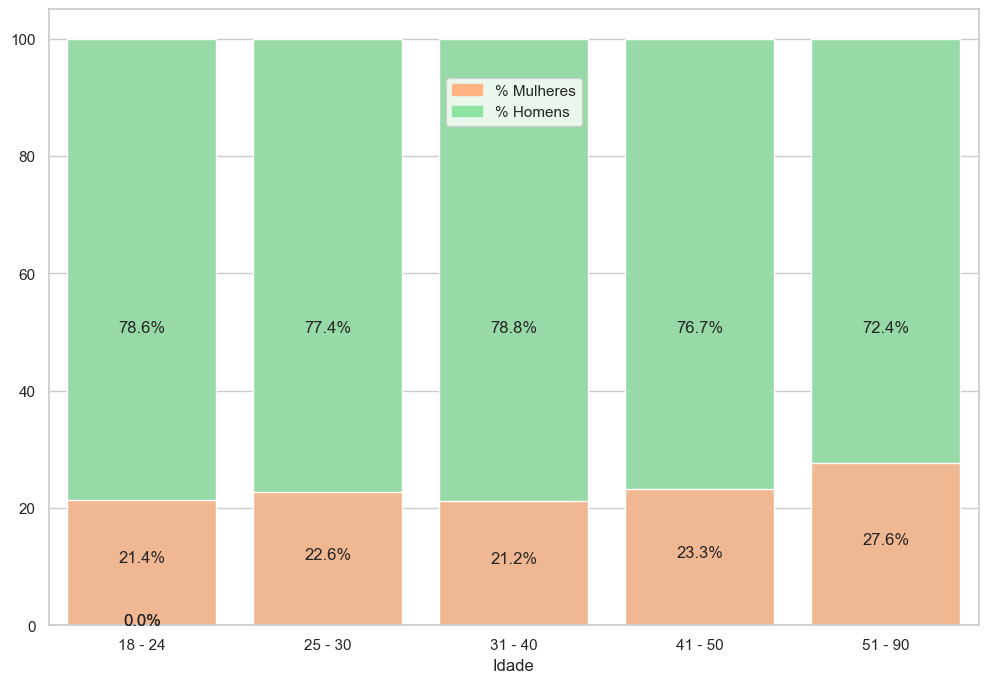

In [75]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize=(12, 8))

# Configuração da grid da imagem:
sns.set(style="whitegrid")

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x="Idade", y="Total", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2022": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i, patch in enumerate(patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() / 2
    
    # Verifica se i é um índice válido para RAIS_GERAL_QNT_GRAF["% Masc."]
    if i < len(RAIS_GERAL_QNT_GRAF["% Masc."]):
        bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."][i]), (x, y), ha='center')

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x="Idade", y="% Fem.", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2022": color_fem})

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color=color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color=color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc='center', bbox_to_anchor=(.45, .8, .1, .1))

# Adicionar rótulos com as porcentagens femininas nas barras
for i in bar2.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    if height < 100.0:
        bar2.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

plt.ylabel('')  # Remover o título do eixo y

plt.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/svg/qnt_sexo_idade.svg")

C:\Users\victo\AppData\Local\Temp\ipykernel_24228\3130124758.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  RAIS_GERAL_2022_BOX["Sexo"].replace(sexo, inplace = True)


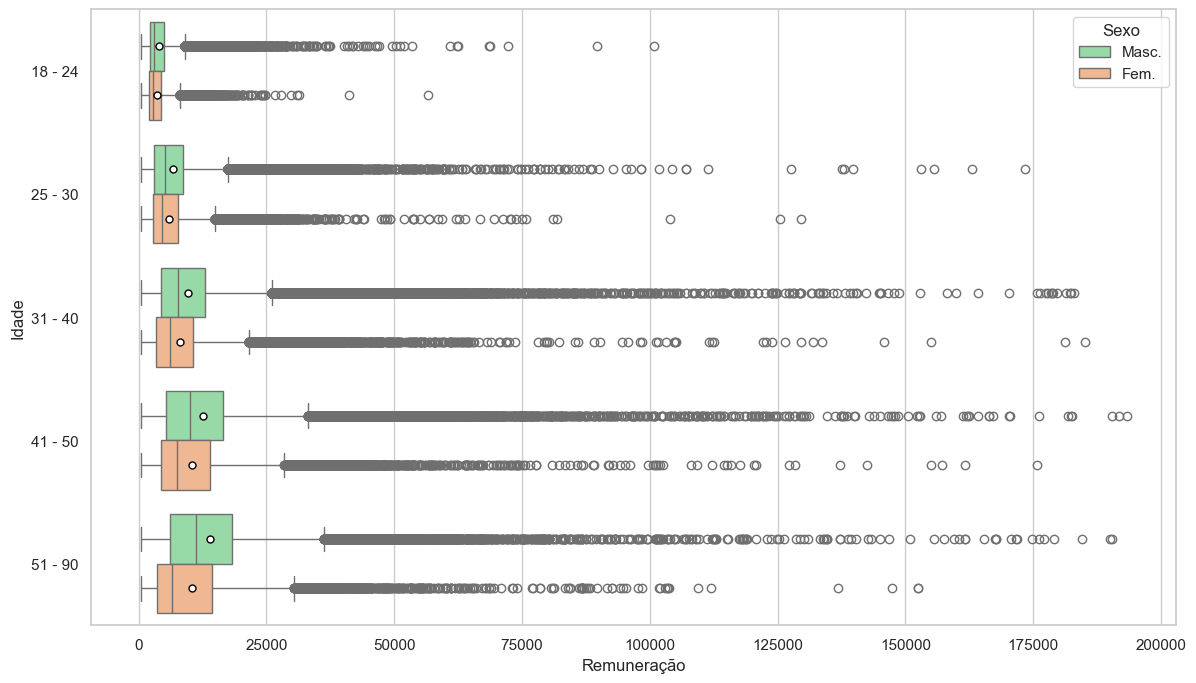

In [76]:
RAIS_GERAL_2022_BOX = RAIS_GERAL_2022.copy()
RAIS_GERAL_2022_BOX["Sexo"].replace(sexo, inplace = True)

box = sns.boxplot(x = 'Remuneração', y = 'Idade', hue = 'Sexo', data = RAIS_GERAL_2022_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = replace_values_faixas.values(),
                        palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/png/boxplot_sexo_idade_2022.png", dpi = 300)

In [77]:
# Tabela principal para média e diferença salarial em 2021:
RAIS_GERAL_2022_MEDIA = pd.crosstab(RAIS_GERAL_2022["Idade"], RAIS_GERAL_2022["Sexo"].replace(sexo), values = RAIS_GERAL_2022.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2022_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2022_MEDIA["Fem."] - RAIS_GERAL_2022_MEDIA["Masc."]) / RAIS_GERAL_2022_MEDIA["Masc."]) * 100)

RAIS_GERAL_2022_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"3,552.21","3,991.64",-11.01
25 - 30,"5,872.50","6,654.23",-11.75
31 - 40,"8,105.39","9,738.23",-16.77
41 - 50,"10,392.02","12,497.67",-16.85
51 - 90,"10,466.18","14,029.58",-25.40


In [78]:
RAIS_GERAL_2022_MEDIA["Ano"] = "2022"

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2022_MEDIA]).reset_index()

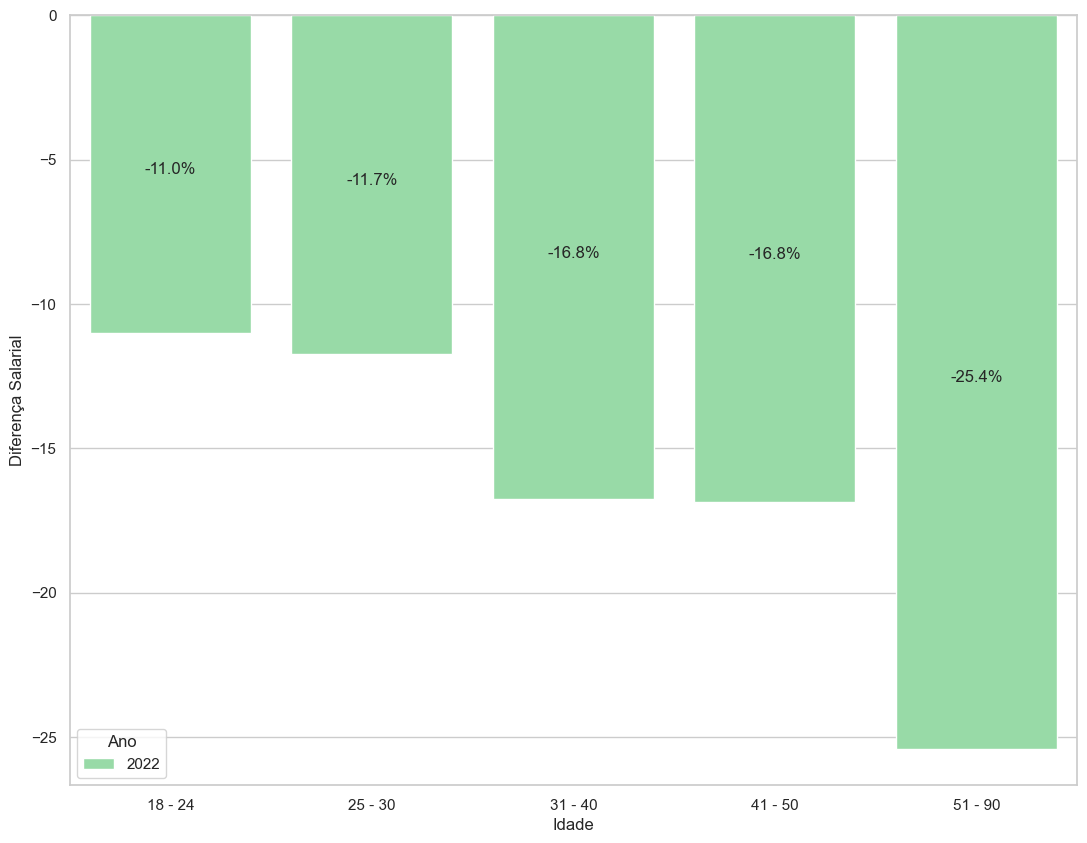

In [79]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Idade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2021": color_fem,"2022": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Prenchimento das porcentagens das diferenças salariais em cada barra:
for i, patch in enumerate(patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() / 2
    
    # Verifica se i é um índice válido para RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"]
    if i < len(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"]):
        bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"].iloc[i]), (x, y), ha='center')

plt.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/png/dif_salarial_sexo_idade_media.png", dpi = 300)

In [80]:
# Tabela principal para média e diferença salarial em 2022:
RAIS_GERAL_2022_MEDIANA = pd.crosstab(RAIS_GERAL_2022["Idade"], RAIS_GERAL_2022["Sexo"].replace(sexo), values = RAIS_GERAL_2022.Remuneração, aggfunc = 'median')
RAIS_GERAL_2022_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2022_MEDIANA["Fem."] - RAIS_GERAL_2022_MEDIANA["Masc."]) / RAIS_GERAL_2022_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2022_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"2,709.44","3,005.34",-9.85
25 - 30,"4,615.89","5,105.26",-9.59
31 - 40,"6,055.44","7,655.68",-20.90
41 - 50,"7,549.72","10,087.50",-25.16
51 - 90,"6,538.87","11,191.50",-41.57


In [81]:
RAIS_GERAL_2022_MEDIANA["Ano"] = "2022"

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2022_MEDIANA]).reset_index()

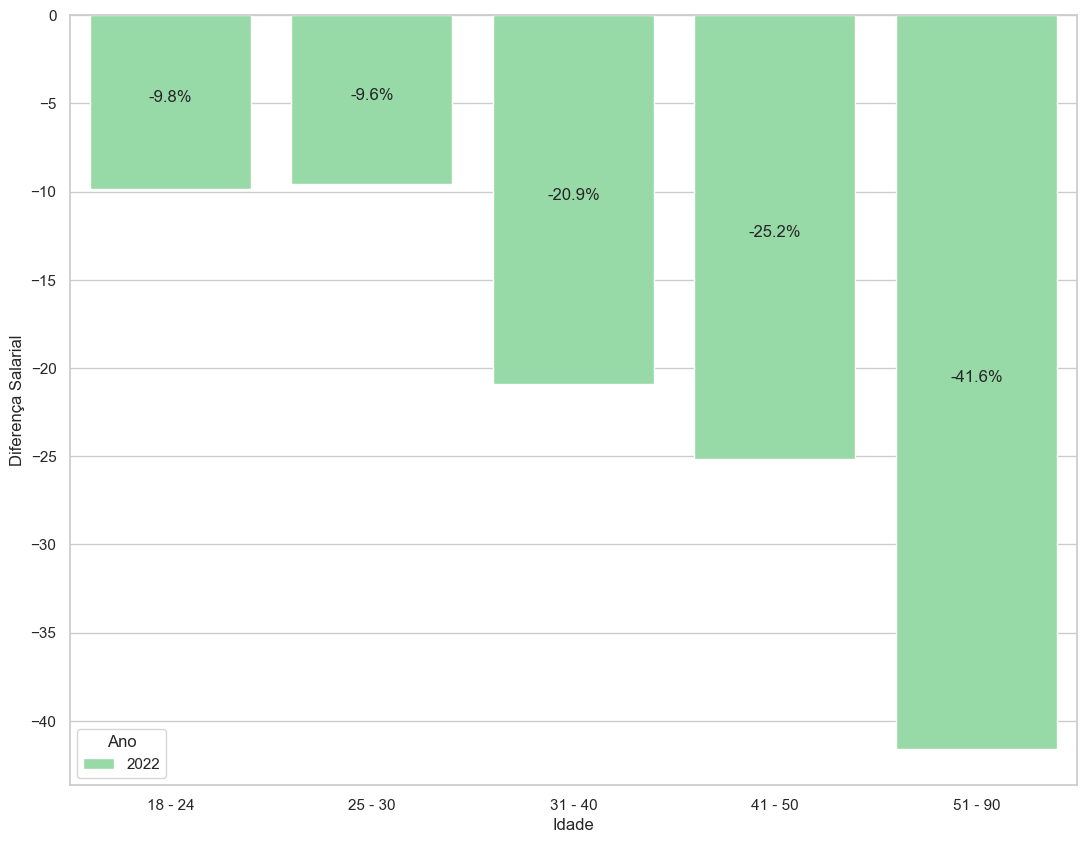

In [82]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Idade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2022": color_fem,"2022": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Prenchimento das porcentagens das diferenças salariais em cada barra:
for i, patch in enumerate(patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() / 2
    
    # Verifica se i é um índice válido para RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"]
    if i < len(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"]):
        bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"].iloc[i]), (x, y), ha='center')

plt.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/png/dif_salarial_sexo_idade_mediana.png", dpi = 300)

In [83]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [84]:
RAIS_GERAL_2022.query("Sexo == 1")

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,317110,82997,1,41 - 50,8,"2,363.73",1
1,MS,212420,47113,1,25 - 30,2,"3,385.09",1
2,MS,212415,47440,3,31 - 40,8,"5,347.59",1
3,MS,212315,38114,4,51 - 90,8,"6,135.89",1
4,MS,212315,38114,4,31 - 40,8,"3,831.76",1
...,...,...,...,...,...,...,...,...
780843,RS,212405,62015,11,31 - 40,2,"6,840.85",1
780844,RS,212405,62015,11,25 - 30,2,"4,278.07",1
780845,RS,142530,62040,11,31 - 40,2,"25,358.57",1
780846,RS,212405,85996,11,41 - 50,2,"7,145.64",1


In [85]:
TESTE_HIP_2022 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for idade in replace_values_faixas:
    df1 = RAIS_GERAL_2022.query("Sexo == 1").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração
    df2 = RAIS_GERAL_2022.query("Sexo == 2").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração
    
    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2022.loc[replace_values_faixas[idade]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2022_HIP = pd.merge(RAIS_GERAL_2022_MEDIANA, TESTE_HIP_2022, left_index=True, right_index=True)
RAIS_GERAL_2022_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2022_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2022_HIP.head()

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Idade,,,,,
18 - 24,"2,709.44","3,005.34",930439657.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
25 - 30,"4,615.89","5,105.26",2816083231.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
31 - 40,"6,055.44","7,655.68",5501317620.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
41 - 50,"7,549.72","10,087.50",1623687158.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
51 - 90,"6,538.87","11,191.50",339466926.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
